In [19]:
#sales prediction with python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
advertiseing_data = pd.read_csv(r"C:\Users\smjn8\Downloads\advertising.csv")
advertiseing_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


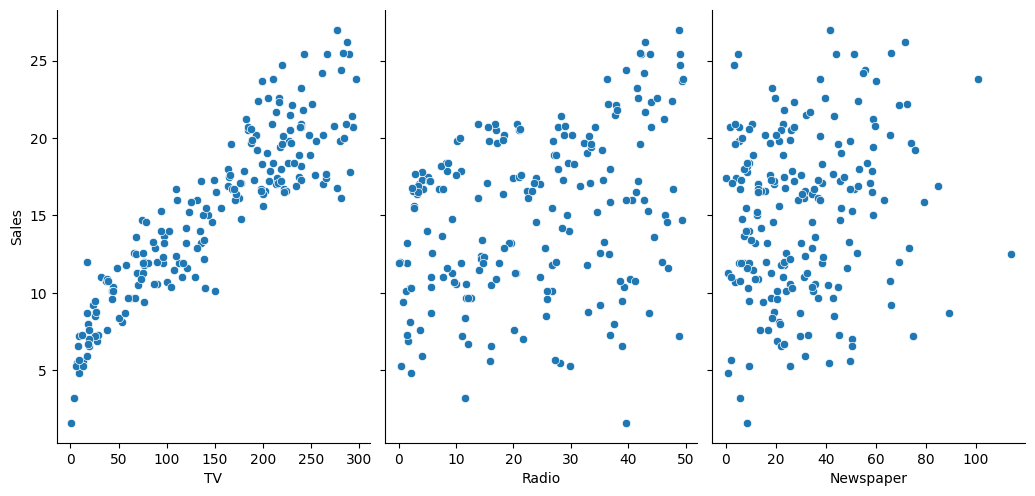

In [8]:
sns.pairplot(advertiseing_data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = advertiseing_data[['TV', 'Radio', 'Newspaper']]
y = advertiseing_data['Sales']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing data with the pandas
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Training model
model = LinearRegression()
model.fit(X_train, y_train)

# making predictions
ypred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mse :",  mse)
print("r2 :", r2)

mse : 610330.8610199287
r2 : -19750.10468623864


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#sample
data = pd.DataFrame({
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4],
    'Sales': [22.1, 10.4, 9.3, 18.5, 12.9]
})

# Spliting data as an feature and target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the scaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# New data for prediction
nd = pd.DataFrame({
    'TV': [160],
    'Radio': [70],
    'Newspaper': [45]
})

# Scale the new data using the same scaler
nds = scaler.transform(nd)

# Predict sales using the model
prediction = model.predict(nds)

print("Predicted Sales:", prediction[0])


Predicted Sales: 27.5440851619409
